# Model
> 一些自己写的模型将会被放在这里

In [ ]:
#| default_exp model

In [ ]:
#| export
from wcpdtoolbox.imports import *

In [ ]:
#| hide
from nbdev.showdoc import *

## Leaf

一个树的结构

In [ ]:
#| export
class BasicLeaf():
    def __init__(self, *args, up=None, show_feature=False, all_leaf=None):
        self.up = up
        if up != None: up.append_down_all_leaf(self)
        
        self.idx = len(all_leaf) if all_leaf != None else 0
        self.all_leaf = all_leaf if all_leaf != None else L(self)
        self.down_all_leaf = L(self)
        self.leaf = L()
        self.items = list(args)
        
        self.show_f = show_feature
        
    def __repr__(self): return f"{self.__class__.__name__}[{self.idx}](n_leaf={len(self.leaf)}, down_all_leaf={len(self.down_all_leaf)}, items={self.items if self.show_f else len(self.items)})"

    def __getitem__(self, n): return self.all_leaf[n]
    def collect(self, func=None, func_filter=None) -> L:
        '''使用func收集对象,filter来筛选'''
        if func != None and func_filter == None: return self.all_leaf, self.all_leaf.map(func)
        elif func == None and func_filter != None: return self.all_leaf[self.all_leaf.map(func_filter)]
        else:
            l = self.all_leaf[self.all_leaf.map(func_filter)]
            return l, l.map(func)
        
    def sort_down(self, by=(lambda x:x.items[0]), func_filter=None, reverse=True, *args, **kwargs):
        '''by=(lambda x:x.features[0]), a func'''
        s = self.down_all_leaf.copy()
        if func_filter != None: s = s[s.map(func_filter)]
        s.sort(key=by, reverse=reverse, *args, **kwargs)
        return s
    
    def sort_all(self, by=(lambda x:x.items[0]), func_filter=None, reverse=True, *args, **kwargs) -> L:
        '''by=(lambda x:x.features[0]), a func'''
        s = self.all_leaf.copy()
        if func_filter != None: s = s[s.map(func_filter)]
        s.sort(key=by, reverse=reverse, *args, **kwargs)
        return s

    def append_down_all_leaf(self, leaf):
        if self.up != None: 
            self.up.down_all_leaf.append(leaf)
            self.up.append_down_all_leaf(leaf)
    
    def add_leaf(self, *args, show_feature=False):
        s = BasicLeaf(*args, up=self, show_feature=show_feature, all_leaf=self.all_leaf)
        self.leaf.append(s)
        self.all_leaf.append(s)
        self.down_all_leaf.append(s)
        
    def show(self, viz=None, *args, **kwargs) -> graphviz.Graph:
        viz = graphviz.Graph(*args, **kwargs) if viz==None else viz
        for m in self.leaf: m.show(viz=viz)
        for m in self.leaf: viz.node(f"{m.idx}")
        for m in self.leaf: viz.edge(f"{self.idx}",f"{m.idx}")
        return viz

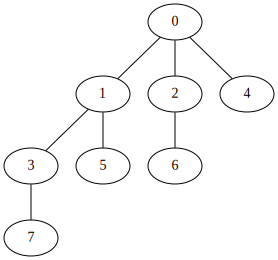

In [ ]:
leaf = BasicLeaf()
for i in range(3):
    all_leaf = leaf.all_leaf.copy()
    for m in all_leaf: m.add_leaf()
leaf.show()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()